Importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.utils import shuffle
%matplotlib inline

Cargamos los datasets de train y test

In [2]:
df_train = pd.read_csv('ChallengeFiles\\TrainMyriad.csv')
df_test = pd.read_csv('ChallengeFiles\\TestMyriad.csv')

Obtenemos el shuffled train dataset y le separamos en X_train (features dataset) e y_train (classes dataset)

In [3]:
df_train = shuffle(df_train)#, random_state=0)
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]
X_test = shuffle(df_test)

In [4]:
# window = 5
# X_train = X_train.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]
# df_test = df_test.rolling(window, center=True, axis=1).mean().iloc[:,(window - 1) // 2 : -(window - 1) // 2]

Generamos algunas visualizaciones del training dataset

In [5]:
from utils.visualization import visualization
viz = visualization(X_train, y_train)

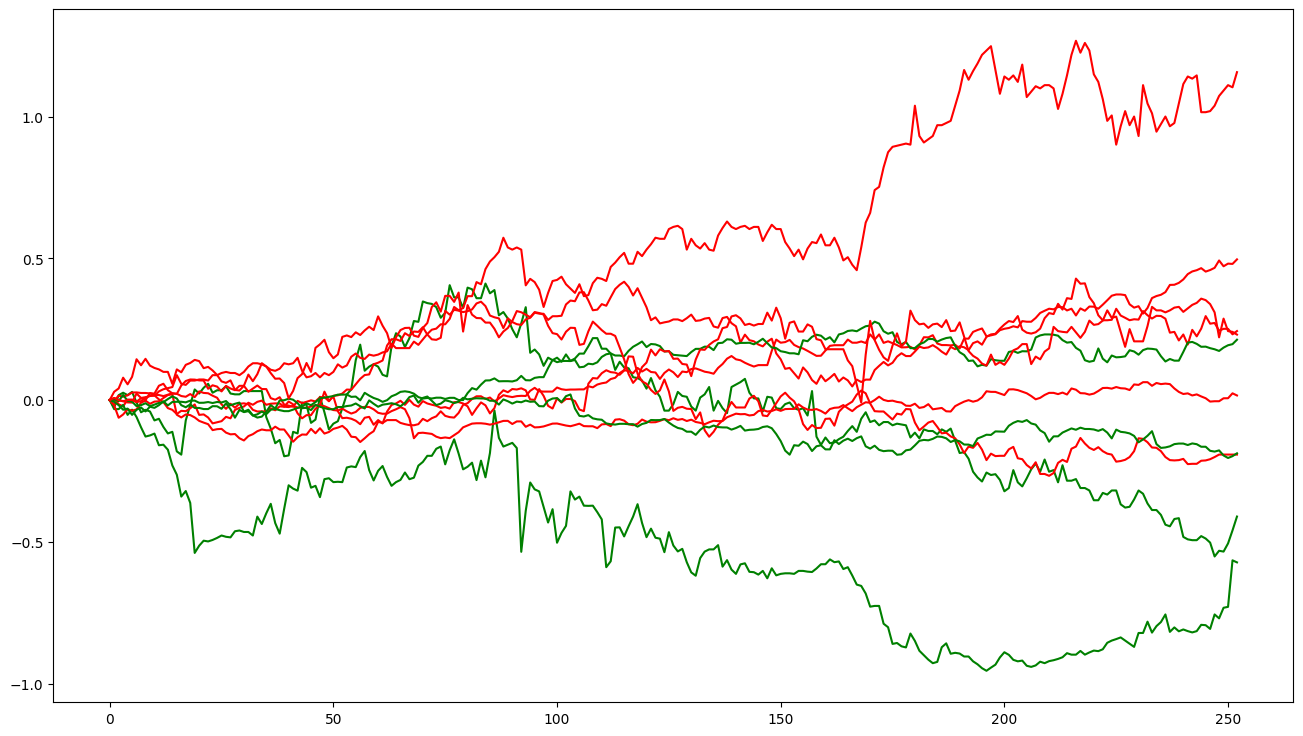

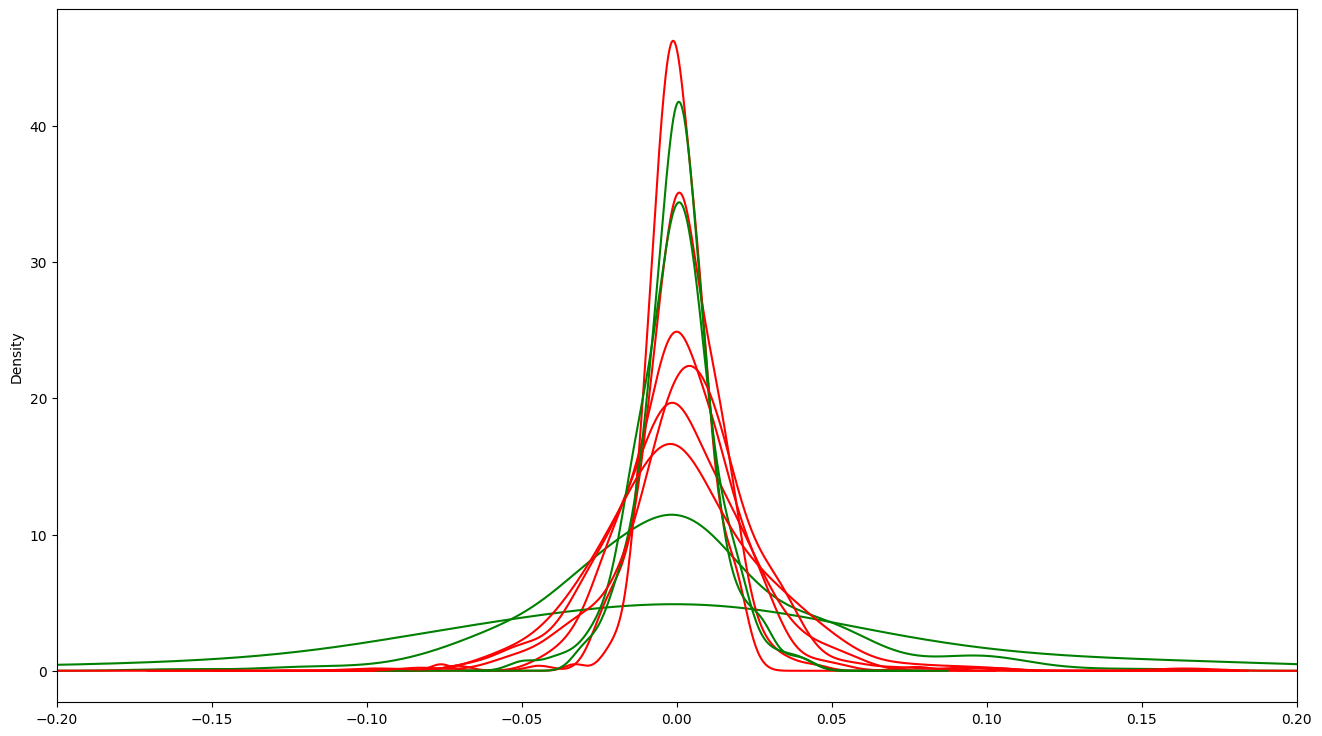

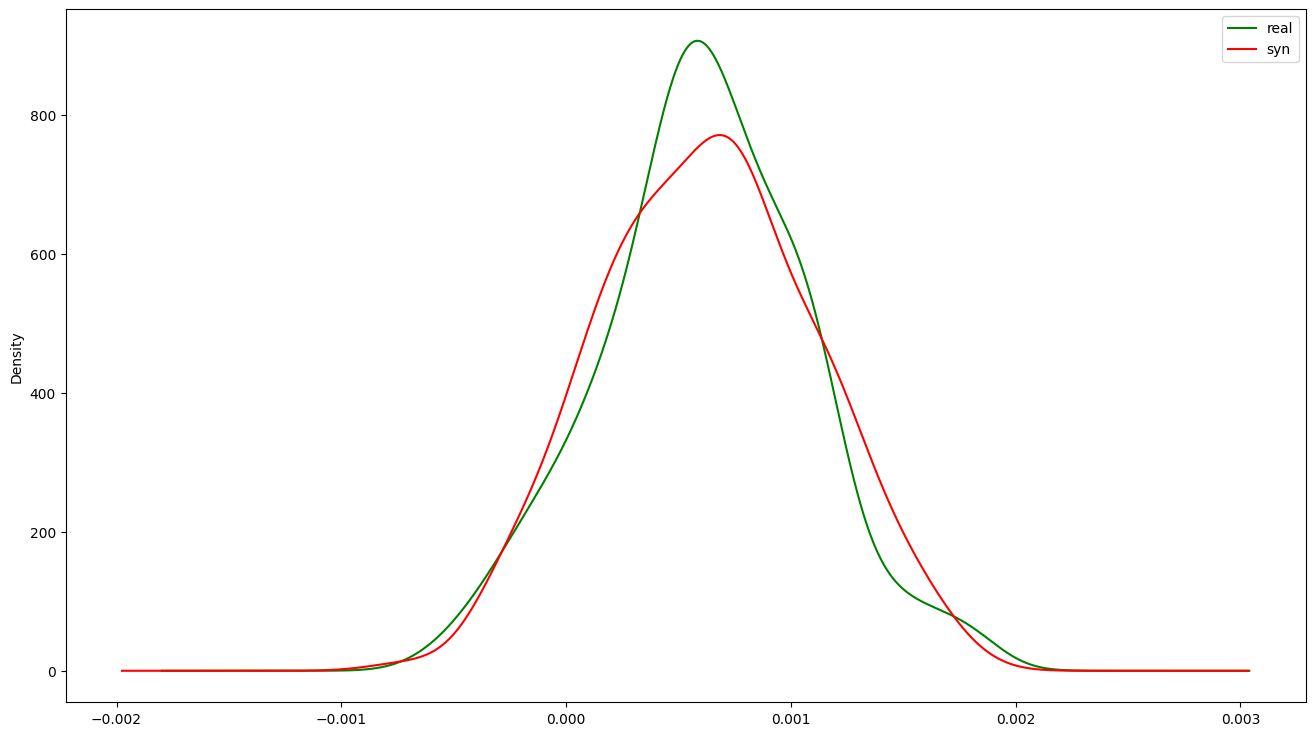

In [6]:
viz.plot_series()
viz.plot_density()
viz.plot_mean_density()

Importamos la clase modeling para estudiar el AUC en el entrenamiento de los modelos

In [7]:
from utils.sklearn_modeling import modeling

Importamos los modelos

In [8]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import Matern, DotProduct
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Estudiamos los mismos

Mean AUC training sub-training set cross-validation score: 0.52
[0.52222903 0.52382741 0.5068265  0.51350601 0.54092631]
AUC training sub-testing set score: 0.49


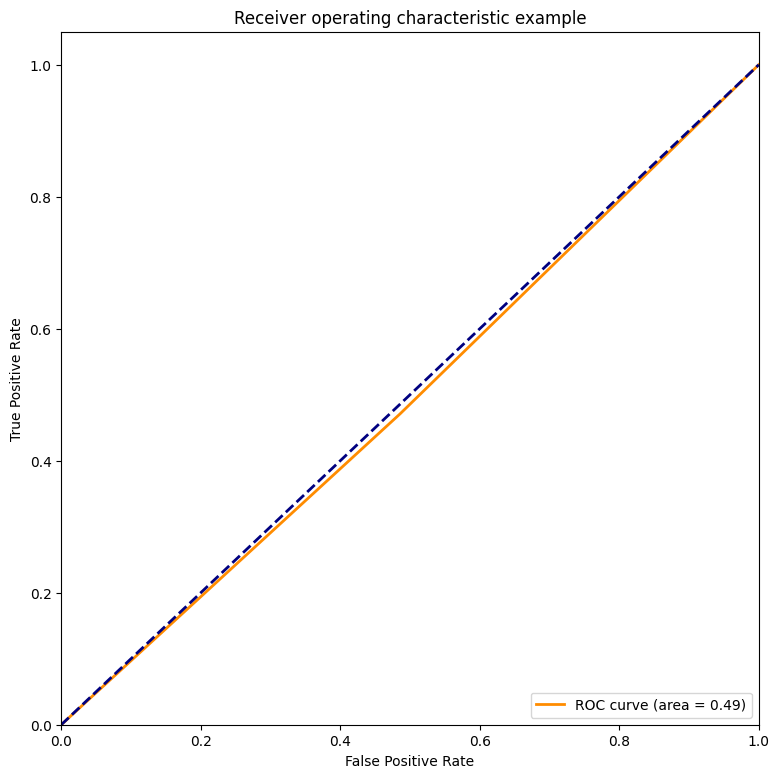

In [9]:
model_xg = modeling(xgb.XGBClassifier(max_depth=10, eval_metric='error'), X_train, y_train, df_test)
model_xg.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.50402123 0.52493794 0.51027241 0.51074602 0.5007839 ]
AUC training sub-testing set score: 0.50


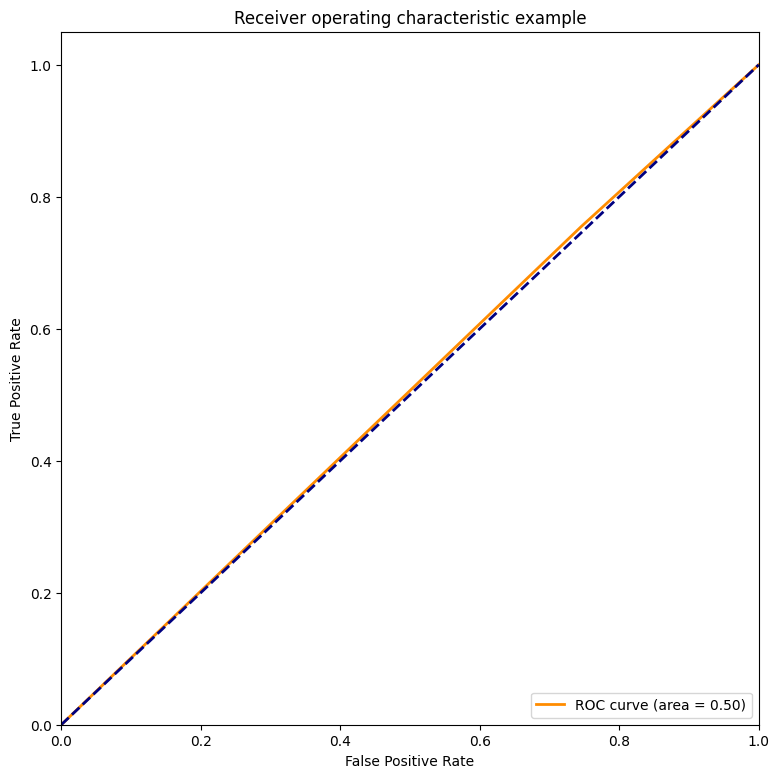

In [10]:
model_knn = modeling(KNeighborsClassifier(3), X_train, y_train, df_test)
model_knn.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.49728516 0.55720865 0.5383133  0.54267377 0.53245035]
AUC training sub-testing set score: 0.50


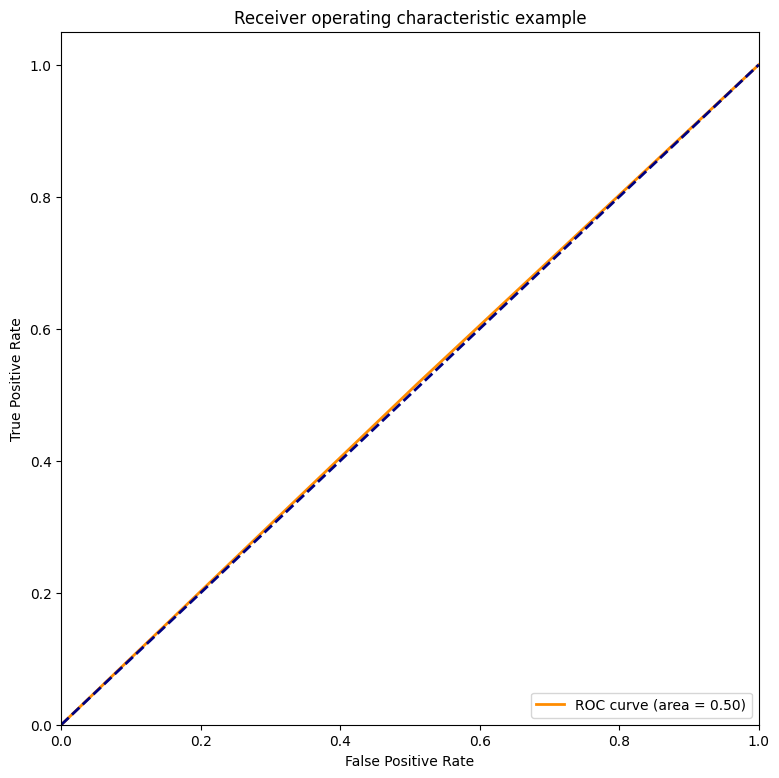

In [11]:
model_svc = modeling(SVC(), X_train, y_train, df_test)
model_svc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.47877118 0.5        0.52281487 0.50545466 0.51949961]
AUC training sub-testing set score: 0.50


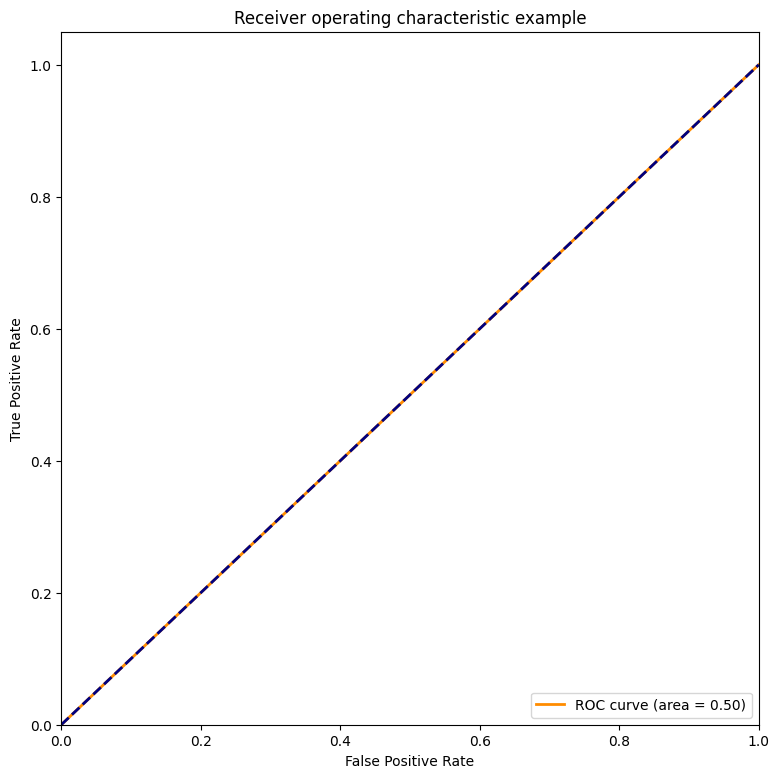

In [12]:
model_gp = modeling(GaussianProcessClassifier(DotProduct()*Matern()), X_train, y_train, df_test)
model_gp.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.49769341 0.52451333 0.48982558 0.52655474 0.53318526]
AUC training sub-testing set score: 0.49


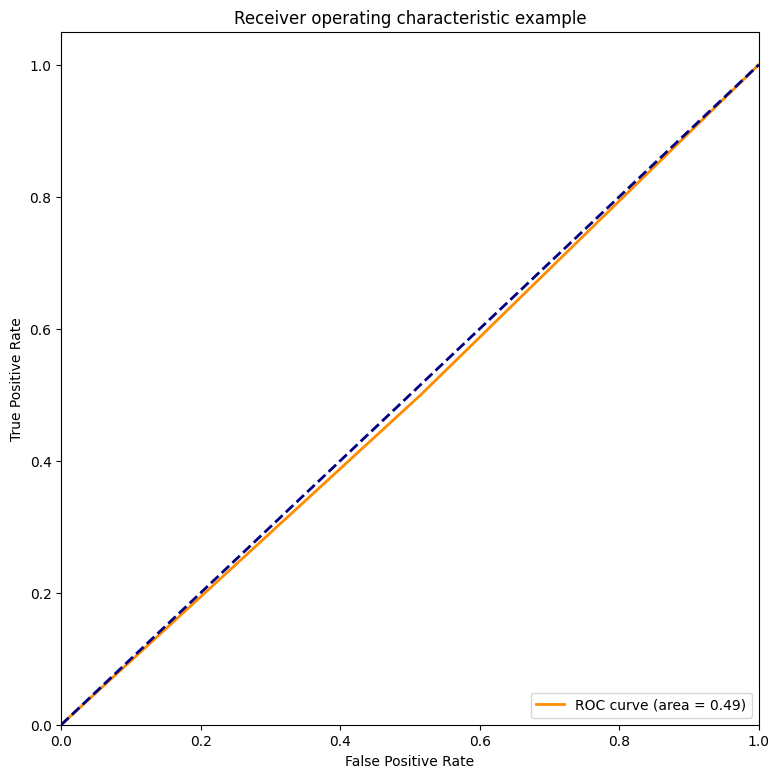

In [13]:
model_dt = modeling(DecisionTreeClassifier(max_depth=10), X_train, y_train, df_test)
model_dt.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.48399673 0.55691469 0.54412725 0.52644042 0.53627188]
AUC training sub-testing set score: 0.52


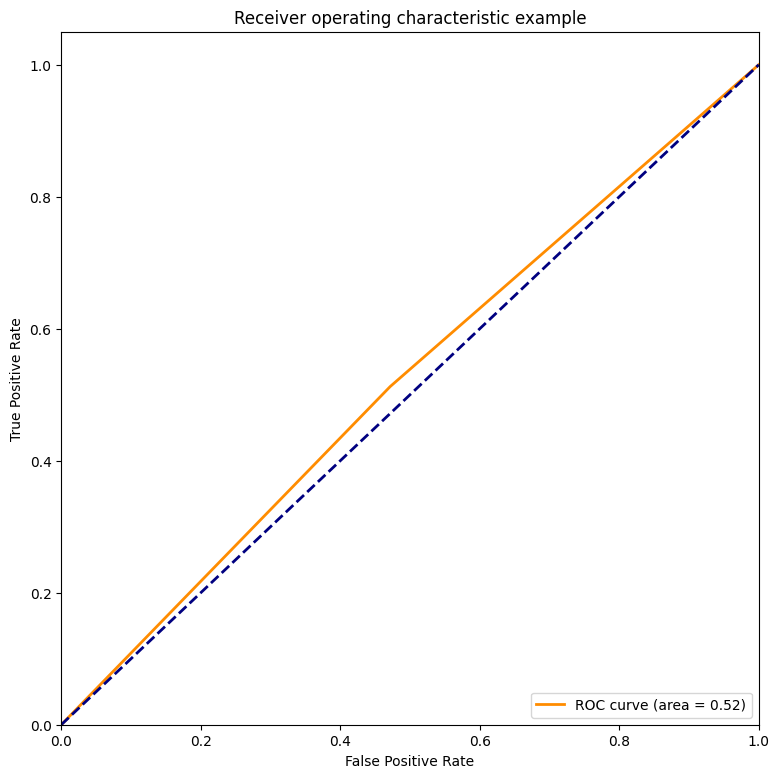

In [14]:
model_rf = modeling(RandomForestClassifier(max_depth=10), X_train, y_train, df_test)
model_rf.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.49048785 0.53517768 0.51192187 0.53133982 0.49975503]
AUC training sub-testing set score: 0.50


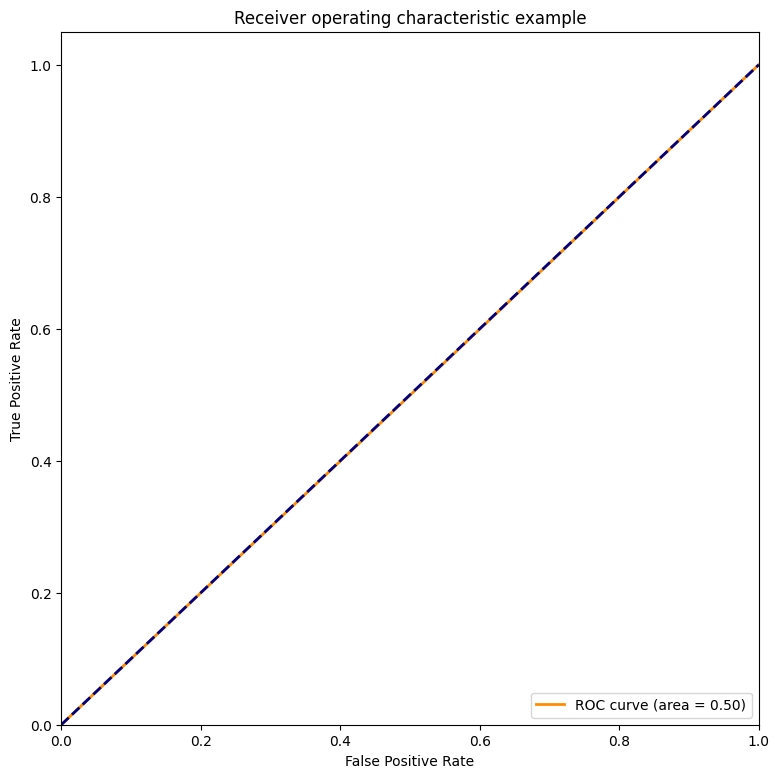

In [15]:
model_mlpc = modeling(MLPClassifier(), X_train, y_train, df_test)
model_mlpc.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.51
[0.48673199 0.53308727 0.51559642 0.49709302 0.50352757]
AUC training sub-testing set score: 0.52


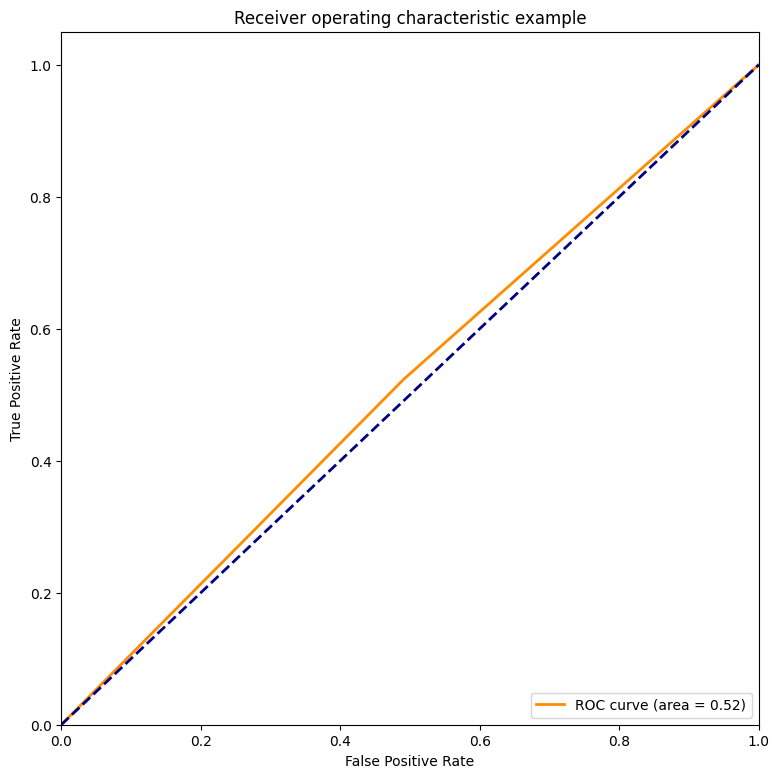

In [16]:
model_ada = modeling(AdaBoostClassifier(), X_train, y_train, df_test)
model_ada.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.52171872 0.54097531 0.51544944 0.52479096 0.52441534]
AUC training sub-testing set score: 0.51


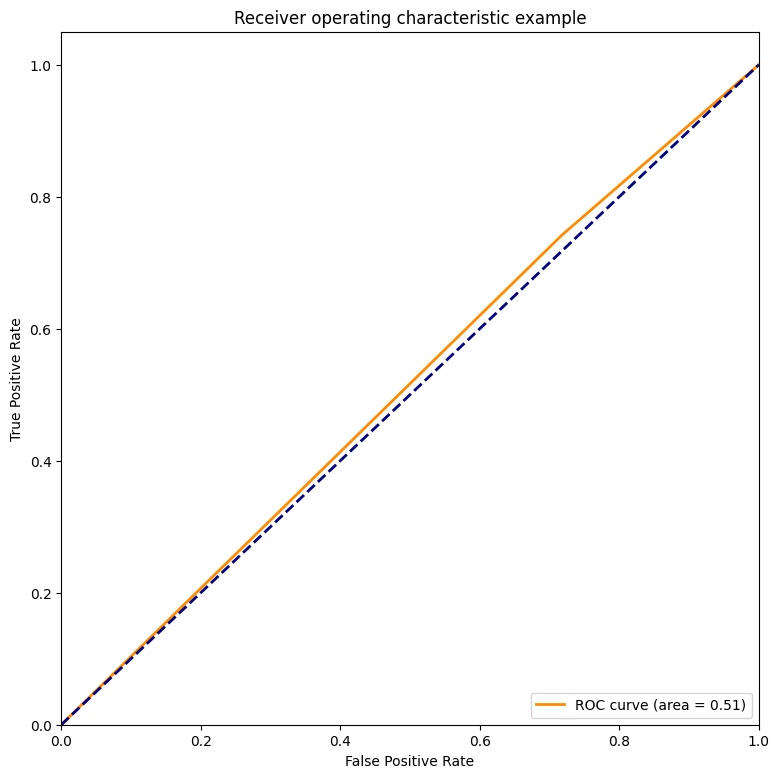

In [17]:
model_gnb = modeling(GaussianNB(), X_train, y_train, df_test)
model_gnb.cv(cv_train=True)

Mean AUC training sub-training set cross-validation score: 0.53
[0.52337212 0.53725176 0.53483473 0.5314868  0.52049582]
AUC training sub-testing set score: 0.52


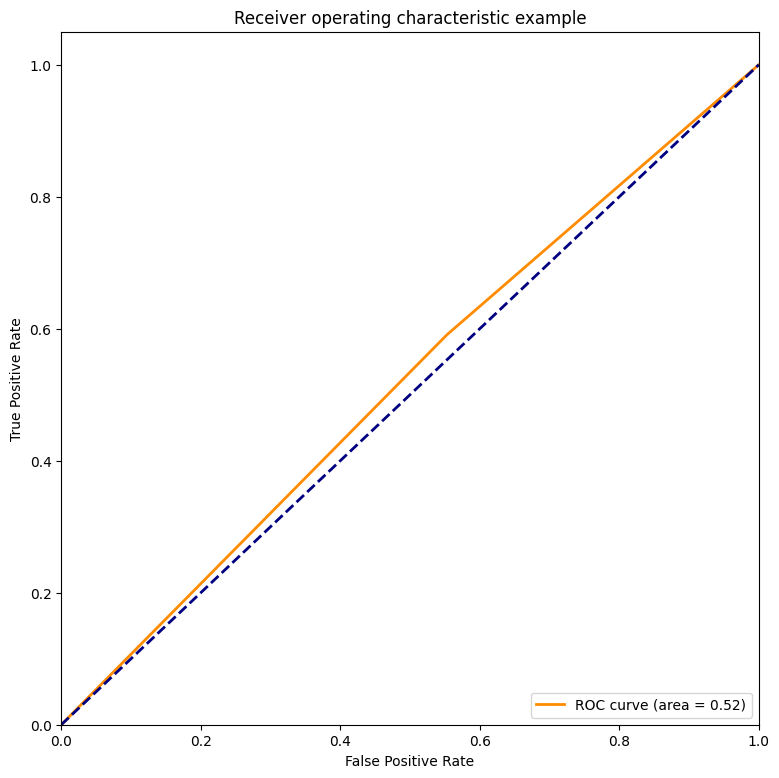

In [18]:
model_qda = modeling(QuadraticDiscriminantAnalysis(), X_train, y_train, df_test)
model_qda.cv(cv_train=True)

https://keras.io/examples/timeseries/timeseries_classification_from_scratch/

In [9]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(2, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=X_train.shape[1:])

In [21]:
epochs = 10
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"],
)
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\marco\anaconda3\envs\MyriadChallenge\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((32, 2) vs (32, 1)).


In [24]:
y_train.shape

(5000,)

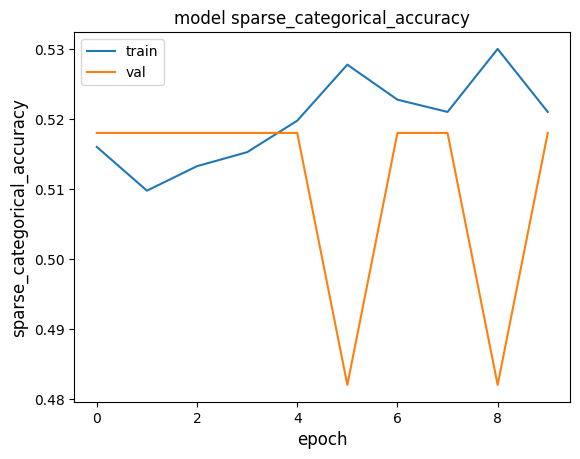

In [18]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [ ]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [16]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

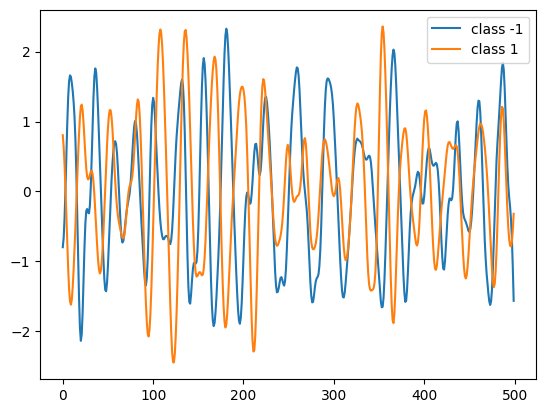

In [18]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [19]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [20]:
num_classes = len(np.unique(y_train))

In [21]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [22]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [27]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])

25/90 [=======>......................] - ETA: 2s - loss: 0.2247 - sparse_categorical_accuracy: 0.9000

In [29]:
epochs = 100
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/100
90/90 [==============================] - 4s 37ms/step - loss: 0.4001 - sparse_categorical_accuracy: 0.7990 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.7559 - lr: 0.0010
Epoch 2/100
90/90 [==============================] - 3s 34ms/step - loss: 0.3898 - sparse_categorical_accuracy: 0.8080 - val_loss: 0.3964 - val_sparse_categorical_accuracy: 0.7490 - lr: 0.0010
Epoch 3/100
90/90 [==============================] - 3s 36ms/step - loss: 0.3784 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.3634 - val_sparse_categorical_accuracy: 0.7767 - lr: 0.0010
Epoch 4/100
90/90 [==============================] - 3s 35ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8191 - val_loss: 0.7189 - val_sparse_categorical_accuracy: 0.6408 - lr: 0.0010
Epoch 5/100
90/90 [==============================] - 3s 35ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.8375 - val_loss: 0.3180 - val_sparse_categorical_accuracy: 0.8835 - lr: 0.0010
Epoch 6/100
90/90 [================

In [30]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 5ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9682
Test accuracy 0.9681817889213562
Test loss 0.10435955226421356


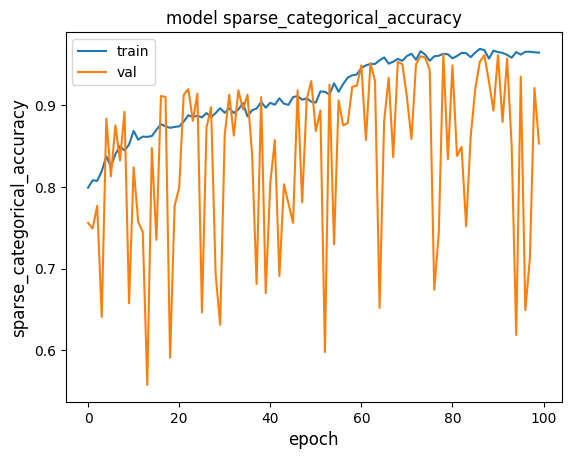

In [31]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()